# Experiment 1
# Pretrained model trail

In [ ]:
from IPython.display import clear_output

In [ ]:
import logging
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns

# Data path

In [ ]:
DATA_PATH = "/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/"

In [ ]:
BATCH_SIZE       = 32
IMG_HEIGHT_WIDTH = 256
IMG_INPUT_SHAPE  = (IMG_HEIGHT_WIDTH, IMG_HEIGHT_WIDTH, 3)
MAX_EPOCHS       = 15

# Train test split

In [ ]:
DS_TRAIN = tf.keras.utils.image_dataset_from_directory(
    DATA_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT_WIDTH, IMG_HEIGHT_WIDTH),
    batch_size=BATCH_SIZE
)
DS_VALID = tf.keras.utils.image_dataset_from_directory(
    DATA_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT_WIDTH, IMG_HEIGHT_WIDTH),
    batch_size=BATCH_SIZE
)

Found 4200 files belonging to 2 classes.
Using 3360 files for training.
Found 4200 files belonging to 2 classes.
Using 840 files for validation.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
DS_TRAIN = DS_TRAIN.cache().prefetch(buffer_size=AUTOTUNE)
DS_VALID = DS_VALID.cache().prefetch(buffer_size=AUTOTUNE)

# Loading ImageNet
# Preparing pre-trained models

In [ ]:
def get_model(tf_model):
    model = None
    if tf_model == "VGG16":
        model = tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_tensor = tf.keras.Input(shape=IMG_INPUT_SHAPE))
    elif tf_model == "ResNet50":
        model = tf.keras.applications.ResNet50(include_top=False, weights="imagenet", input_tensor = tf.keras.Input(shape=IMG_INPUT_SHAPE))
    elif tf_model == "MobileNetV2":
        model = tf.keras.applications.MobileNetV2(include_top=False, weights="imagenet", input_tensor = tf.keras.Input(shape=IMG_INPUT_SHAPE))
    else:
        raise Exception('SUNXYZ', 'Model unknown')
    return_model = tf.keras.models.Sequential()
    return_model.add(model)
    return_model.add(tf.keras.layers.Flatten())
    return_model.add(tf.keras.layers.Dense(512))
    return_model.add(tf.keras.layers.Dense(256, activation='relu'))
    return_model.add(tf.keras.layers.Dense(64, activation='relu'))
    return_model.add(tf.keras.layers.Dense(2, activation='softmax'))
    return return_model

In [ ]:
BASIC_MODEL = tf.keras.models.Sequential()
BASIC_MODEL.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
BASIC_MODEL.add(tf.keras.layers.MaxPooling2D((2, 2)))
BASIC_MODEL.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
BASIC_MODEL.add(tf.keras.layers.MaxPooling2D((2, 2)))
BASIC_MODEL.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
BASIC_MODEL.add(tf.keras.layers.Flatten())
BASIC_MODEL.add(tf.keras.layers.Dense(256, activation='relu'))
BASIC_MODEL.add(tf.keras.layers.Dense(64, activation='relu'))
BASIC_MODEL.add(tf.keras.layers.Dense(2, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# VGG16, ResNet50, MobileNetV2

In [ ]:
VGG16_MODEL       = get_model("VGG16")
RESNET50_MODEL    = get_model("ResNet50")
MOBILENETv2_MODEL = get_model("MobileNetV2")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/tmp/ipykernel_30/1458139494.py:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = tf.keras.applications.MobileNetV2(include_top=False, weights="imagenet", input_tensor = tf.keras.Input(shape=IMG_INPUT_SHAPE))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
VGG16_MODEL.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
RESNET50_MODEL.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
MOBILENETv2_MODEL.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
def compile_and_fit(model):
    model.compile(optimizer='adam',
      loss=tf.losses.SparseCategoricalCrossentropy(),
      metrics=['accuracy'])
    history = model.fit(
      DS_TRAIN,
      validation_data=DS_VALID,
      epochs=MAX_EPOCHS
    )
    return history

In [ ]:
VGG16_HISTORY = compile_and_fit(VGG16_MODEL)

Epoch 1/15


I0000 00:00:1733113593.664121     116 service.cc:145] XLA service 0x7dc28c003380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733113593.664188     116 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1733113619.600984     116 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_10', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_9', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_8', 4 bytes spill stores, 12 bytes spill loads

I0000 00:00:1733113619.607717     116 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


105/105 ━━━━━━━━━━━━━━━━━━━━ 65s 332ms/step - accuracy: 0.7278 - loss: 44.9249 - val_accuracy: 0.8595 - val_loss: 0.3116
Epoch 2/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 49s 264ms/step - accuracy: 0.8378 - loss: 0.3808 - val_accuracy: 0.8226 - val_loss: 0.3486
Epoch 3/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 28s 264ms/step - accuracy: 0.8136 - loss: 0.4811 - val_accuracy: 0.8821 - val_loss: 0.2777
Epoch 4/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 28s 264ms/step - accuracy: 0.8210 - loss: 0.4749 - val_accuracy: 0.8250 - val_loss: 0.4911
Epoch 5/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 28s 264ms/step - accuracy: 0.8082 - loss: 0.9238 - val_accuracy: 0.8250 - val_loss: 0.3251
Epoch 6/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 28s 264ms/step - accuracy: 0.8212 - loss: 0.3861 - val_accuracy: 0.8619 - val_loss: 0.2958
Epoch 7/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 28s 264ms/step - accuracy: 0.8427 - loss: 0.3245 - val_accuracy: 0.9286 - val_loss: 0.1947
Epoch 8/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 28s 264ms/step - accuracy: 0.9089 - loss: 0.2654 - va

In [ ]:
RESNET50_HISTORY = compile_and_fit(RESNET50_MODEL)

Epoch 1/15


I0000 00:00:1733114120.844520     113 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_11', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_5', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_23', 36 bytes spill stores, 56 bytes spill loads
ptxas warning : Registers are spilled to local memory in function '__cuda_sm3x_div_rn_noftz_f32_slowpath', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_divide_multiply_subtract_fusion_66', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_divide_multiply_subtract_fusion_53', 4 bytes spill stores, 4 bytes spill loads



105/105 ━━━━━━━━━━━━━━━━━━━━ 84s 245ms/step - accuracy: 0.8707 - loss: 5.4508 - val_accuracy: 0.8250 - val_loss: 406066364416.0000
Epoch 2/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step - accuracy: 0.8539 - loss: 4.2951 - val_accuracy: 0.8655 - val_loss: 4.2008
Epoch 3/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step - accuracy: 0.9332 - loss: 0.2353 - val_accuracy: 0.9512 - val_loss: 0.1298
Epoch 4/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step - accuracy: 0.9517 - loss: 0.1308 - val_accuracy: 0.9655 - val_loss: 0.0953
Epoch 5/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step - accuracy: 0.9668 - loss: 0.0989 - val_accuracy: 0.9536 - val_loss: 0.1207
Epoch 6/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step - accuracy: 0.9731 - loss: 0.0750 - val_accuracy: 0.9702 - val_loss: 0.0963
Epoch 7/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step - accuracy: 0.9762 - loss: 0.0580 - val_accuracy: 0.9667 - val_loss: 0.1124
Epoch 8/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step - accuracy: 0.9722 - loss: 0

In [ ]:
MOBILENETv2_HISTORY = compile_and_fit(MOBILENETv2_MODEL)

Epoch 1/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 60s 147ms/step - accuracy: 0.9129 - loss: 1.2878 - val_accuracy: 0.7750 - val_loss: 5.5340
Epoch 2/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.9955 - loss: 0.0168 - val_accuracy: 0.8893 - val_loss: 6.2112
Epoch 3/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.9979 - loss: 0.0111 - val_accuracy: 0.9333 - val_loss: 1.8054
Epoch 4/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.9999 - loss: 0.0017 - val_accuracy: 0.9726 - val_loss: 0.8190
Epoch 5/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9969 - loss: 0.0158 - val_accuracy: 0.9393 - val_loss: 5.0365
Epoch 6/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.9979 - loss: 0.0121 - val_accuracy: 0.8250 - val_loss: 32.2106
Epoch 7/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.9901 - loss: 0.0669 - val_accuracy: 0.8262 - val_loss: 42.5983
Epoch 8/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.9988 - loss: 

# Model Evaluation

In [ ]:
df_VGG16_HISTORY = pd.DataFrame(VGG16_HISTORY.history)
df_RESNET50_HISTORY = pd.DataFrame(RESNET50_HISTORY.history)
df_MOBILENETv2_HISTORY = pd.DataFrame(MOBILENETv2_HISTORY.history)

In [ ]:
df_history = df_VGG16_HISTORY.merge(df_RESNET50_HISTORY, how='inner', left_index=True, right_index=True, suffixes=('_VGG16', '_RESNET50'))
df_history = df_history.merge(df_MOBILENETv2_HISTORY, how='inner', left_index=True, right_index=True)
df_history = df_history.rename(columns={"loss"          : "loss_MOBILENETv2",
                                        "accuracy"      : "accuracy_MOBILENETv2",
                                        "val_loss"      : "val_loss_MOBILENETv2",
                                        "val_accuracy"  : "val_accuracy_MOBILENETv2"})

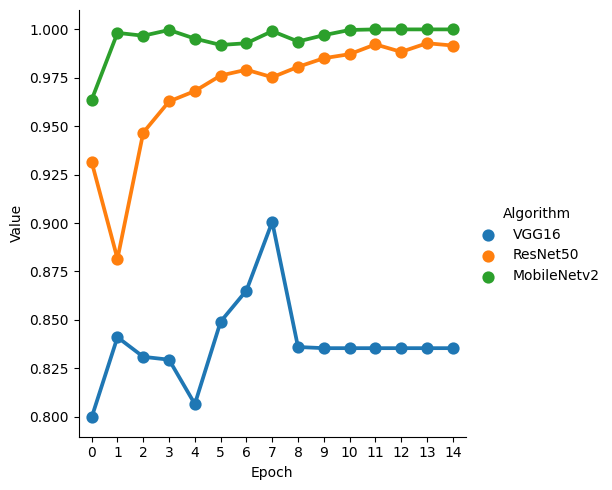

In [ ]:
his = df_history.filter(regex='^accuracy_',axis=1).reset_index()
his.columns = ["Epoch", "VGG16", "ResNet50", "MobileNetv2"]
his = his.melt('Epoch', var_name='Algorithm', value_name='Value')
sns.catplot(x="Epoch", y="Value", hue='Algorithm', data=his, kind='point')


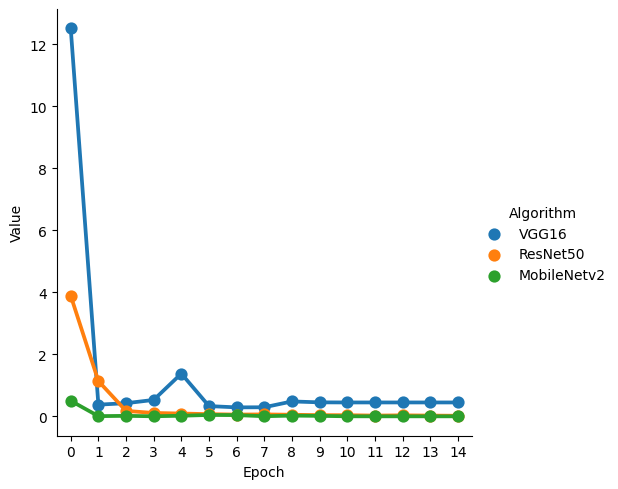

In [ ]:
his = df_history.filter(regex='^loss_',axis=1).reset_index()
his.columns = ["Epoch", "VGG16", "ResNet50", "MobileNetv2"]
his = his.melt('Epoch', var_name='Algorithm', value_name='Value')
sns.catplot(x="Epoch", y="Value", hue='Algorithm', data=his, kind='point')

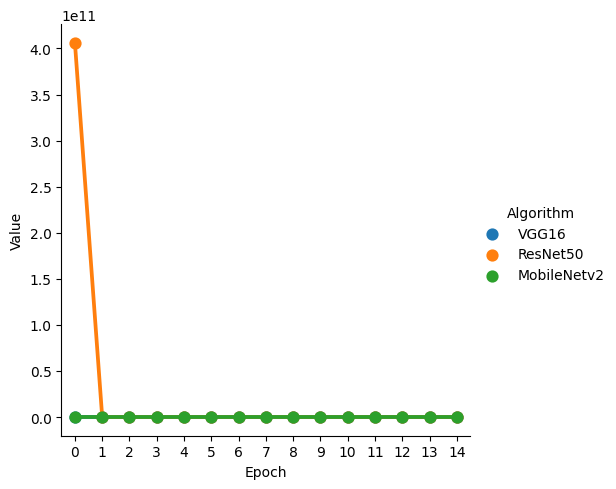

In [ ]:
his = df_history.filter(regex='^val_loss_',axis=1).reset_index()
his.columns = ["Epoch", "VGG16", "ResNet50", "MobileNetv2"]
his = his.melt('Epoch', var_name='Algorithm', value_name='Value')
sns.catplot(x="Epoch", y="Value", hue='Algorithm', data=his, kind='point')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

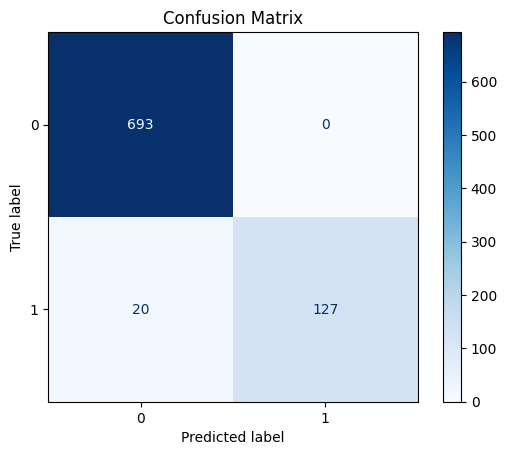

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score

# Evaluate the model and get predictions
y_true = []  # Ground truth labels
y_pred = []  # Predicted labels

for images, labels in DS_VALID:
    y_true.extend(labels.numpy())  # Add ground truth labels
    predictions = MOBILENETv2_MODEL.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))  # Add predicted labels

# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"Weighted F1 Score: {f1:.2f}")

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix with integer labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(cm.shape[0]))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# Result evaluation

1. VGG16: validation accuracy: 82
2. ResNet50: validation accuracy: 96
3. MobileNetV2: validation accuracy: 97

# MobileNetV2 performed best

F1 score: 98

Limitations of MobileNetV2 here:

1. Confusion matrix is not good
2. Overfitting

Reason:

1. Less data

# Moving on BaseLine CNN model

# EXP 01 CNN

In [ ]:
import cv2 as cv
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import os

In [ ]:
normaldir = '/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal'
tbdir = '/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis'
images = []
labels = []
imagesize = 256

In [ ]:
for x in os.listdir(normaldir):
    imagedir = os.path.join(normaldir, x)
    image = cv.imread(imagedir, cv.IMREAD_GRAYSCALE)
    image = cv.resize(image, (imagesize, imagesize))
    images.append(image)
    labels.append(0)

for y in os.listdir(tbdir):
    imagedir = os.path.join(tbdir, y)
    image = cv.imread(imagedir, cv.IMREAD_GRAYSCALE)
    image = cv.resize(image, (imagesize, imagesize))
    images.append(image)
    labels.append(1)

In [ ]:
images = np.array(images)
labels = np.array(labels)

#Splitting the images and labels into training and testing sets, then normalizing the values within them for computational efficiency (from 0-255 scale to 0-1 scale)
imagetrain, imagetest, labeltrain, labeltest = train_test_split(images, labels, test_size=0.3, random_state=42)
imagetrain = (imagetrain.astype('float32'))/255
imagetest = (imagetest.astype('float32'))/255

In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE

# Debugging and checking dimensions
print(f"Initial shape of imagetrain: {imagetrain.shape}")
print(f"Total elements in imagetrain: {imagetrain.size}")

# Calculate expected size
expected_size = 2940 * (imagesize * imagesize)
print(f"Expected size for reshaping: {expected_size}")

# Ensure the sizes match before reshaping
if imagetrain.size == expected_size:
    # Reshape imagetrain to prepare for SMOTE
    imagetrain = imagetrain.reshape(2940, imagesize * imagesize)
    print(f"Shape after reshaping for SMOTE: {imagetrain.shape}")

    # Perform SMOTE oversampling
    smote = SMOTE(random_state=42)
    imagetrain, labeltrain = smote.fit_resample(imagetrain, labeltrain)

    # Unflatten images for CNN input
    imagetrain = imagetrain.reshape(-1, imagesize, imagesize, 1)
    print(f"Final shape of imagetrain for CNN: {imagetrain.shape}")
else:
    print("Mismatch in sizes! Reshape cannot proceed.")


Initial shape of imagetrain: (5880, 256, 256)
Total elements in imagetrain: 385351680
Expected size for reshaping: 192675840
Mismatch in sizes! Reshape cannot proceed.


In [ ]:
'''
imagetrain = imagetrain.reshape(2940, (imagesize*imagesize))

#Performing oversampling
smote = SMOTE(random_state=42)
imagetrain, labeltrain = smote.fit_resample(imagetrain, labeltrain)

#Unflattening the images now to use them for convolutional neural network (4914 images of 256x256 size, with 1 color channel (grayscale, as compared to RGB with 3 color channels))
imagetrain = imagetrain.reshape(-1, imagesize, imagesize, 1)
print(imagetrain.shape)

'''

ValueError: cannot reshape array of size 385351680 into shape (2940,65536)

In [ ]:
print(np.unique(labeltrain, return_counts=True))

(array([0, 1]), array([4865, 1015]))


In [ ]:
#Importing the necessary libraries
import tensorflow as tf
import keras
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
cnn = keras.Sequential(
    [
    #Input layer, same shape as all the images (256x256x1):
    keras.Input(shape=(224, 224, 1)),

    #1st convolutional layer:
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    #2nd convolutional layer:
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    #3rd convolutional layer:
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    #Flattening layer for the dense layers:
    Flatten(),

    #1st dense layer following the convolutional layers:
    Dense(64, activation='relu'),

    #Dropout layer with heavy dropout rate to avoid overfitting in the large-ish dataset
    Dropout(0.5),

    #Output layer that squeezes each image to either 0 or 1 with sigmoid activation
    Dense(1, activation='sigmoid')
    ]
)

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,768,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,792,321 (10.65 MB)

 Trainable params: 2,792,321 (10.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.compile(
    loss='binary_crossentropy', #Best for binary classification
    optimizer = keras.optimizers.Adam(learning_rate=0.001), #Good starting LR for dataset of this size
    metrics=['accuracy'], #Looking for accuracy
)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.1, patience=1, min_lr=0.00001, verbose=1)

#Fitting the model w/ the callback. ON VS CODE, batch size of 16 makes each epoch take around a minute in this case w/ good accuracy, making the whole training process 10 min, but on Kaggle it should take longer due to less computational resources:
cnn.fit(imagetrain, labeltrain, batch_size=16, epochs=10, verbose=2, callbacks = [reduce_lr])

Epoch 1/10
368/368 - 10s - 26ms/step - accuracy: 0.8974 - loss: 0.2310 - learning_rate: 0.0010
Epoch 2/10


I0000 00:00:1733116143.095898     114 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_1', 68 bytes spill stores, 68 bytes spill loads



368/368 - 3s - 9ms/step - accuracy: 0.9537 - loss: 0.1293 - learning_rate: 0.0010
Epoch 3/10
368/368 - 3s - 9ms/step - accuracy: 0.9697 - loss: 0.0910 - learning_rate: 0.0010
Epoch 4/10
368/368 - 3s - 8ms/step - accuracy: 0.9799 - loss: 0.0637 - learning_rate: 0.0010
Epoch 5/10
368/368 - 3s - 9ms/step - accuracy: 0.9828 - loss: 0.0545 - learning_rate: 0.0010
Epoch 6/10
368/368 - 3s - 8ms/step - accuracy: 0.9879 - loss: 0.0435 - learning_rate: 0.0010
Epoch 7/10

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
368/368 - 3s - 8ms/step - accuracy: 0.9876 - loss: 0.0404 - learning_rate: 0.0010
Epoch 8/10
368/368 - 3s - 9ms/step - accuracy: 0.9949 - loss: 0.0222 - learning_rate: 1.0000e-04
Epoch 9/10

Epoch 9: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
368/368 - 3s - 9ms/step - accuracy: 0.9947 - loss: 0.0200 - learning_rate: 1.0000e-04
Epoch 10/10
368/368 - 3s - 9ms/step - accuracy: 0.9971 - loss: 0.0177 - learning_rate: 1.0000e-05


In [ ]:
print('TESTING DATA:')
cnn.evaluate(imagetest, labeltest, batch_size=32, verbose=2)

print('ADVANCED TESTING METRICS:')
from sklearn.metrics import classification_report, confusion_matrix
predictions = cnn.predict(imagetest, batch_size=32)
predicted_labels = (predictions > 0.5).astype('int32')
print(classification_report(labeltest, predicted_labels))
print(confusion_matrix(labeltest, predicted_labels))

TESTING DATA:
79/79 - 2s - 26ms/step - accuracy: 0.9925 - loss: 0.0259
ADVANCED TESTING METRICS:
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2135
           1       0.97      0.98      0.98       385

    accuracy                           0.99      2520
   macro avg       0.98      0.99      0.99      2520
weighted avg       0.99      0.99      0.99      2520

[[2125   10]
 [   9  376]]


Confusion Matrix:
[[2125   10]
 [   9  376]]


<Figure size 800x600 with 0 Axes>

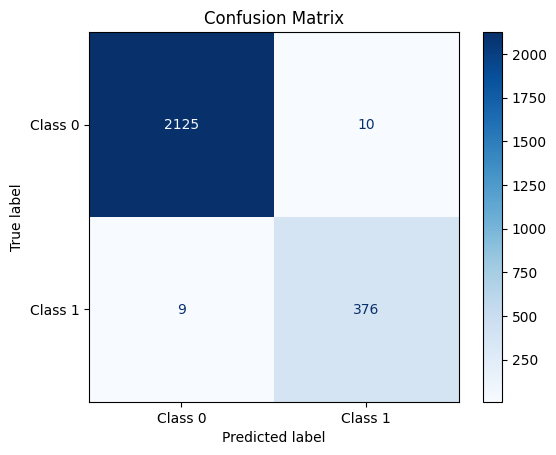

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Print confusion matrix as text
cm = confusion_matrix(labeltest, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# Finally we are satisfied

Comparison:

1. Confusion matrix is good
2. F-1 is 1
3. Computational time is 10X faster
4. Parameters are less